In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from kmodes.kmodes import KModes
from sklearn import preprocessing
from sklearn import utils
%matplotlib inline
sb.set() # set the default Seaborn style for graphics

## IMPORTING AND CLEANING THE DATASET

In [2]:
# Importing Dataset
animeData = pd.read_csv('anime.csv')
animeData.head()

C:\Users\Tharun1207\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,48,49,50,51,52,53,54,55,58,59,60,67,68,69,70,71,72,73,74,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MAL_ID,Name,Score,Genres,Genre 1,Genre2,Genre 2,Genre3,Genre 3,Genre4,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Adventure,Comedy,Comedy,Drama,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Drama,Mystery,Mystery,Sci-Fi,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Sci-Fi,Adventure,Adventure,Comedy,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Mystery,Police,Police,Supernatural,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Fantasy,Shounen,Shounen,Supernatural,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


In [3]:
# Removing repeated columns
animeData1 = animeData.drop(columns = ['Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10', 'Genre11', 'Genre12', 'Genre13', 'Studio2', 'Studio3', 'Studio4', 'Studio5', 'Studio6', 'Studio7'])
animeData1.head()

,MAL_ID,Name,Score,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Mystery,Sci-Fi,Space,NaN,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Police,Supernatural,Drama,Magic,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Shounen,Supernatural,NaN,NaN,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


In [4]:
# Removing irrelevant columns
animeDataUpdated = animeData1.drop(columns = ['Japanese name', 'Premiered', 'Members', 'Favorites', 'Popularity', 'Watching', 'Plan to Watch', 'Producers', 'Producer 1', 'Producer 2', 'Producer 3', 'Producer 4', 'Producer 5', 'Producer 6', 'Producer 7', 'Producer 8', 'Producer 9', 'Producer 10', 'Producer 11', 'Producer 12', 'Producer 13', 'Producer 14', 'Producer 15', 'Producer 16', 'Producer 17', 'Producer 18', 'Producer 19', 'Producer 20', 'Licensors', 'Licensor 1', 'Licensor 2', 'Licensor 3', 'Licensor 4'])
animeDataUpdated.head()

,MAL_ID,Name,Score,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Mystery,Sci-Fi,Space,NaN,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Police,Supernatural,Drama,Magic,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Shounen,Supernatural,NaN,NaN,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


In [5]:
animeDataUpdated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17562 non-null  int64 
 1   Name                   17562 non-null  object
 2   Score                  17562 non-null  object
 3   Genres                 17562 non-null  object
 4   Genre 1                17562 non-null  object
 5   Genre 2                13270 non-null  object
 6   Genre 3                9029 non-null   object
 7   Genre 4                5534 non-null   object
 8   Genre 5                2959 non-null   object
 9   Genre 6                1237 non-null   object
 10  Genre 7                439 non-null    object
 11  Genre 8                143 non-null    object
 12  Genre 9                58 non-null     object
 13  Genre 10               21 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [6]:
# Removing unknown rows from source
animeDFClean = animeDataUpdated[animeDataUpdated['Source'] != 'Unknown']
animeDFClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13995 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 13995 non-null  int64 
 1   Name                   13995 non-null  object
 2   Score                  13995 non-null  object
 3   Genres                 13995 non-null  object
 4   Genre 1                13995 non-null  object
 5   Genre 2                10699 non-null  object
 6   Genre 3                7546 non-null   object
 7   Genre 4                4822 non-null   object
 8   Genre 5                2644 non-null   object
 9   Genre 6                1139 non-null   object
 10  Genre 7                405 non-null    object
 11  Genre 8                127 non-null    object
 12  Genre 9                48 non-null     object
 13  Genre 10               20 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [7]:
# Removing invalid rows from Completion Percentage
animeDFClean1 = animeDFClean[animeDFClean['Completion Percentage'] != '#DIV/0!']
animeDFClean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13704 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 13704 non-null  int64 
 1   Name                   13704 non-null  object
 2   Score                  13704 non-null  object
 3   Genres                 13704 non-null  object
 4   Genre 1                13704 non-null  object
 5   Genre 2                10466 non-null  object
 6   Genre 3                7384 non-null   object
 7   Genre 4                4732 non-null   object
 8   Genre 5                2592 non-null   object
 9   Genre 6                1116 non-null   object
 10  Genre 7                398 non-null    object
 11  Genre 8                125 non-null    object
 12  Genre 9                48 non-null     object
 13  Genre 10               20 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [8]:
# Converting the data types of values under Completion Percentage to float data type
animeDFClean1['Completion Percentage'] = pd.to_numeric(animeDFClean1['Completion Percentage'])

<ipython-input-8-15277ecd400d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animeDFClean1['Completion Percentage'] = pd.to_numeric(animeDFClean1['Completion Percentage'])


## EXPLORATORY DATA ANALYSIS FOR SOURCE

Original         5136
Manga            3752
Visual novel      985
Game              853
Light novel       742
Other             579
Novel             473
Music             314
4-koma manga      284
Web manga         240
Picture book      144
Book              111
Card game          64
Digital manga      15
Radio              12
Name: Source, dtype: int64


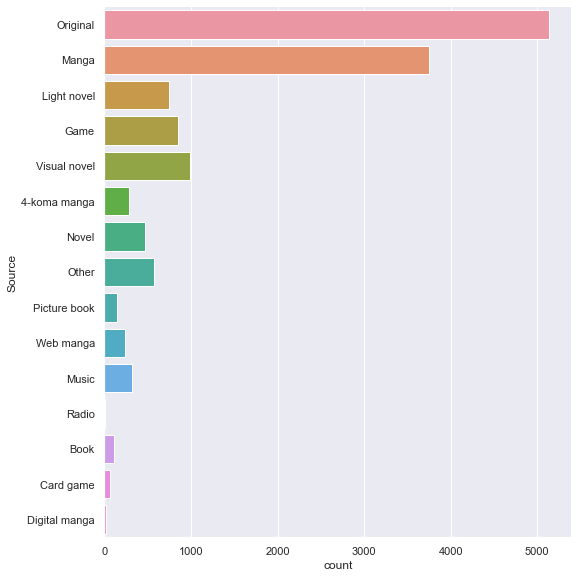

In [9]:
# Finding number of animes for each source type
print(animeDFClean1['Source'].value_counts())
sb.catplot(y = 'Source', data = animeDFClean1, kind = "count", height = 8, aspect = 1)

## ANALYSIS FOR SOURCE

In [10]:
# Adding encoded values of source types into dataframe
animeDFClean1['Source'] = animeDFClean1['Source'].astype('category')
animeDFClean1['Source Numeric'] = animeDFClean1['Source'].cat.codes
animeDFClean1

<ipython-input-10-459172f6aa9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animeDFClean1['Source'] = animeDFClean1['Source'].astype('category')
<ipython-input-10-459172f6aa9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animeDFClean1['Source Numeric'] = animeDFClean1['Source'].cat.codes


,MAL_ID,Name,Score,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage,Source Numeric
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,131625,62330,20688,8904,3184,1357,741,1580,0.846060106,9
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Mystery,Sci-Fi,Space,NaN,...,49505,22632,5805,1877,577,221,109,379,0.802929859,9
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,...,86142,49432,15376,5838,1965,664,316,533,0.740957413,6
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Police,Supernatural,Drama,Magic,...,10128,11618,5709,2920,1083,353,164,131,0.437816545,9
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Shounen,Supernatural,NaN,NaN,...,1242,1713,1068,634,265,83,50,27,0.351679892,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,Unknown,"Sci-Fi, Space, Vampire",Sci-Fi,Space,Vampire,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,#VALUE!,5
17556,48480,Wan Jie Shen Zhu 3rd Season,Unknown,"Adventure, Fantasy",Adventure,Fantasy,NaN,NaN,NaN,NaN,...,2,1,1,Unknown,Unknown,Unknown,Unknown,Unknown,#VALUE!,6
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Comedy,Horror,Supernatural,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,#VALUE!,6
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Adventure,Slice of Life,Comedy,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,#VALUE!,6


In [13]:
# Table to see mapping of different types of sources
sourceDFMain = pd.DataFrame(animeDFClean1[['Source', 'Source Numeric']])
sourceDFMain.value_counts()

Source         Source Numeric
Original       9                 5136
Manga          6                 3752
Visual novel   13                 985
Game           4                  853
Light novel    5                  742
Other          10                 579
Novel          8                  473
Music          7                  314
4-koma manga   0                  284
Web manga      14                 240
Picture book   11                 144
Book           1                  111
Card game      2                   64
Digital manga  3                   15
Radio          12                  12
dtype: int64

<AxesSubplot:xlabel='Source Numeric', ylabel='Completion Percentage'>

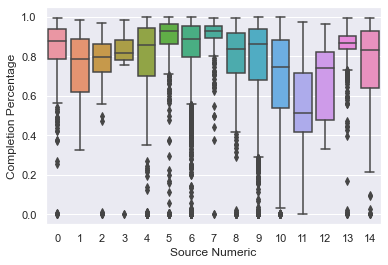

In [14]:
# Box-Plot of encoded values against completion percentage
plt.figure()
sb.boxplot(x = 'Source Numeric', y = 'Completion Percentage', data = animeDFClean1)

In [16]:
# Combined dataframe for Source and Completion Percentage
source_completePrc_DF = pd.DataFrame(animeDFClean1[['Source', 'Completion Percentage']])

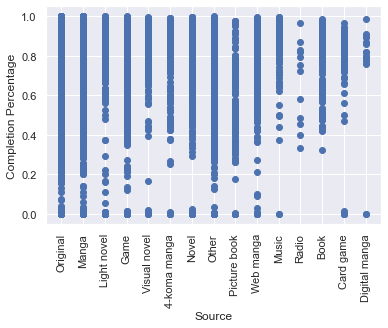

In [17]:
# Scatter plot for Source and Completion Percentage
plt.scatter(animeDFClean1['Source'], animeDFClean1['Completion Percentage'])
plt.xlabel('Source')
plt.ylabel('Completion Percentage')
plt.xticks(rotation = 90)
plt.show()

## ENCODING

In [18]:
# Label Encoding the sources
le = preprocessing.LabelEncoder()
sourceLabelEncoded = le.fit_transform(animeDFClean1['Source'])
print(sourceLabelEncoded)
print(utils.multiclass.type_of_target(sourceLabelEncoded))
print(utils.multiclass.type_of_target(sourceLabelEncoded.astype('int')))
print(utils.multiclass.type_of_target(sourceLabelEncoded))

[9 9 6 ... 6 6 4]
multiclass
multiclass
multiclass


In [36]:
# Initialising X and Y

X = sourceLabelEncoded.reshape(-1, 1)
y = animeDFClean1['Completion Percentage']

In [20]:
# Importing K-Means model from sklearn
from sklearn.cluster import KMeans

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.7825095181287559
For n_clusters = 4 The average silhouette_score is : 0.8242666658935132
For n_clusters = 5 The average silhouette_score is : 0.8511739993359606


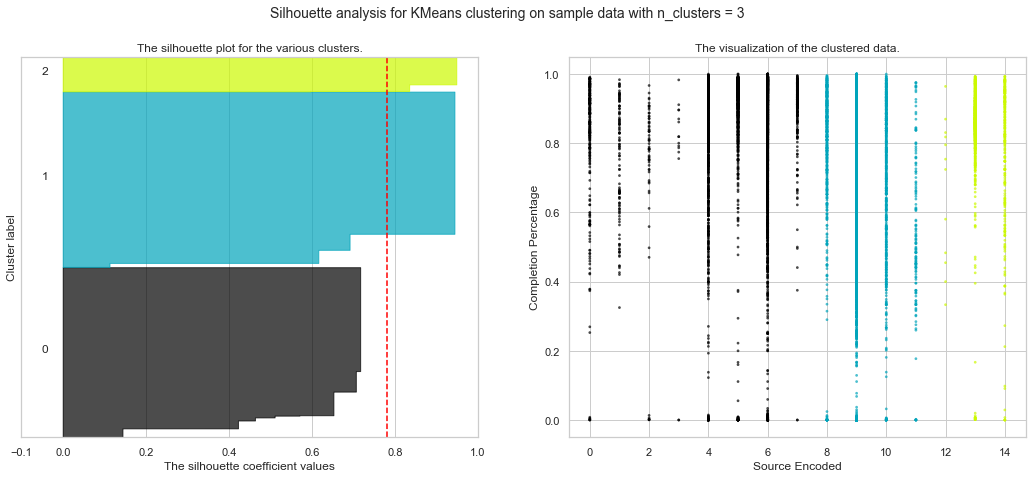

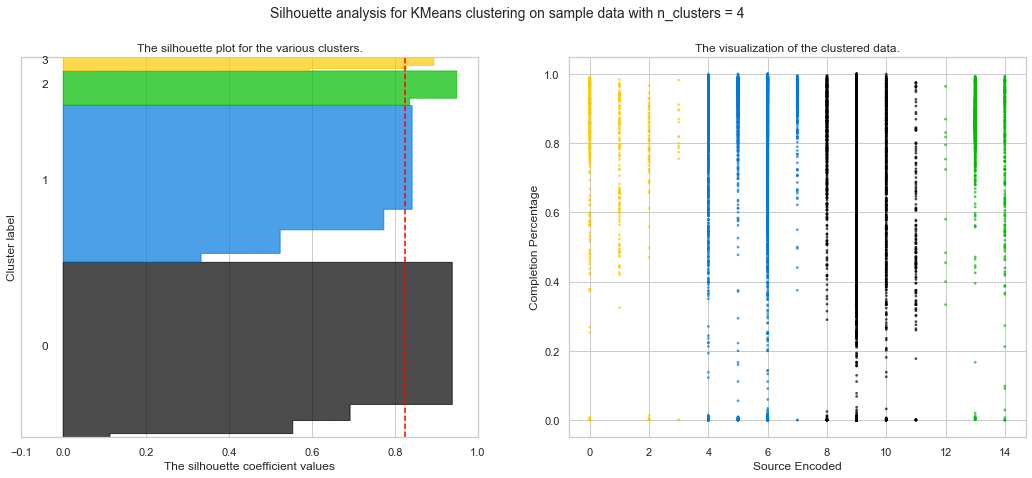

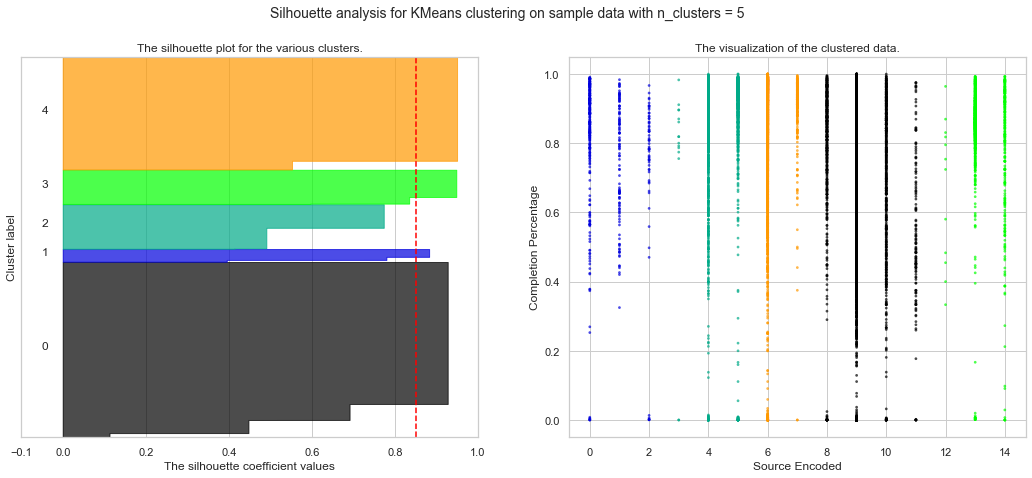

In [37]:
# Silhouette Analysis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters) #random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X, y, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Source Encoded")
    ax2.set_ylabel("Completion Percentage")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14) 

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

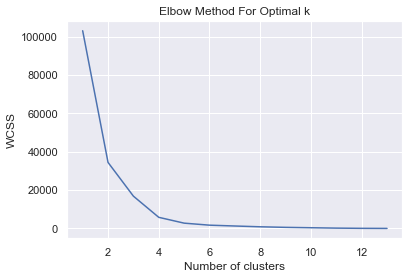

In [21]:
# Elbow Method to figure out best number of clusters

wcss=[]
for i in range(1,14):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,14)
plt.plot(number_clusters,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## K-MEANS ALGORITHM

In [22]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [23]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 1, ..., 1, 1, 4])

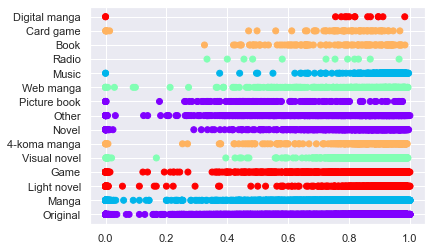

In [24]:
# Scatter Plot to show different clusters
data_with_clusters = source_completePrc_DF.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Completion Percentage'],data_with_clusters['Source'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [25]:
# Inserting column for clusters
source_completePrc_DF.insert(0, 'Cluster', identified_clusters, True)

In [26]:
source_completePrc_DF

,Cluster,Source,Completion Percentage
0,0,Original,0.879720
1,0,Original,0.987182
2,1,Manga,0.897122
3,0,Original,0.814715
4,1,Manga,0.796038
...,...,...,...
17555,4,Light novel,0.000000
17556,1,Manga,0.000000
17558,1,Manga,0.000000
17560,1,Manga,0.400000


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS

In [27]:
# Separating Cluster 0 members

Cluster0DF = source_completePrc_DF.query('Cluster == 0')
print(Cluster0DF)

# Finding the genres in Cluster 0
Cluster0DF.Source.unique()

       Cluster    Source  Completion Percentage
0            0  Original               0.879720
1            0  Original               0.987182
3            0  Original               0.814715
16           0  Original               0.726134
20           0  Original               0.935857
...        ...       ...                    ...
17524        0  Original               0.000000
17526        0  Original               0.925000
17537        0  Original               0.000000
17538        0     Other               1.000000
17552        0  Original               0.986045

[6332 rows x 3 columns]


['Original', 'Novel', 'Other', 'Picture book']
Categories (4, object): ['Original', 'Novel', 'Other', 'Picture book']

In [28]:
# Separating Cluster 1 members

Cluster1DF = source_completePrc_DF.query('Cluster == 1')
print(Cluster1DF)

# Finding the genres in Cluster 1
Cluster1DF.Source.unique()

       Cluster Source  Completion Percentage
2            1  Manga               0.897122
4            1  Manga               0.796038
5            1  Manga               0.752271
6            1  Manga               0.779701
7            1  Manga               0.873463
...        ...    ...                    ...
17549        1  Manga               0.363636
17551        1  Manga               0.000000
17556        1  Manga               0.000000
17558        1  Manga               0.000000
17560        1  Manga               0.400000

[4066 rows x 3 columns]


['Manga', 'Music']
Categories (2, object): ['Manga', 'Music']

In [29]:
# Separating Cluster 2 members

Cluster2DF = source_completePrc_DF.query('Cluster == 2')
print(Cluster2DF)

# Finding the genres in Cluster 2
Cluster2DF.Source.unique()

       Cluster        Source  Completion Percentage
43           2  Visual novel               0.843385
58           2  Visual novel               0.869598
80           2  Visual novel               0.903788
98           2  Visual novel               0.922003
112          2  Visual novel               0.912363
...        ...           ...                    ...
17215        2  Visual novel               0.729730
17239        2  Visual novel               0.878327
17248        2     Web manga               0.500000
17313        2     Web manga               0.859617
17317        2  Visual novel               0.006593

[1237 rows x 3 columns]


['Visual novel', 'Web manga', 'Radio']
Categories (3, object): ['Visual novel', 'Web manga', 'Radio']

In [30]:
# Separating Cluster 3 members

Cluster3DF = source_completePrc_DF.query('Cluster == 3')
print(Cluster3DF)

# Finding the genres in Cluster 3
Cluster3DF.Source.unique()

       Cluster        Source  Completion Percentage
47           3  4-koma manga               0.830622
279          3  4-koma manga               0.864372
388          3  4-koma manga               0.967684
455          3  4-koma manga               0.859681
458          3  4-koma manga               0.889889
...        ...           ...                    ...
17088        3  4-koma manga               0.000000
17112        3     Card game               0.857724
17145        3  4-koma manga               0.004662
17189        3  4-koma manga               0.003906
17452        3          Book               0.611111

[459 rows x 3 columns]


['4-koma manga', 'Book', 'Card game']
Categories (3, object): ['4-koma manga', 'Book', 'Card game']

In [31]:
# Separating Cluster 4 members

Cluster4DF = source_completePrc_DF.query('Cluster == 4')
print(Cluster4DF)

# Finding the genres in Cluster 4
Cluster4DF.Source.unique()

       Cluster       Source  Completion Percentage
17           4  Light novel               0.827863
36           4         Game               0.812009
51           4  Light novel               0.898549
52           4  Light novel               0.962417
53           4  Light novel               0.966722
...        ...          ...                    ...
17540        4  Light novel               0.160000
17543        4  Light novel               0.294118
17544        4  Light novel               0.222222
17555        4  Light novel               0.000000
17561        4         Game               0.000000

[1610 rows x 3 columns]


['Light novel', 'Game', 'Digital manga']
Categories (3, object): ['Light novel', 'Game', 'Digital manga']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

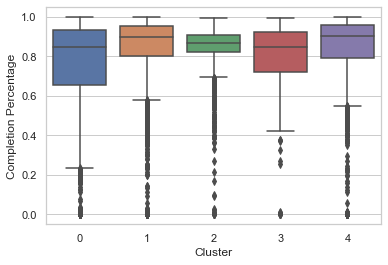

In [32]:
# Boxplot of the clusters

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = source_completePrc_DF)

In [57]:
source_completePrc_DF.describe()

,Cluster,Completion Percentage
count,13704.000000,13704.000000
mean,0.996424,0.798840
std,1.070145,0.212108
min,0.000000,0.000000
25%,0.000000,0.746323
50%,1.000000,0.871680
75%,1.000000,0.939898
max,4.000000,1.000000


In [34]:
# Summary Stats of each cluster

print(Cluster0DF.describe())
print()
print(Cluster1DF.describe())
print()
print(Cluster2DF.describe())
print()
print(Cluster3DF.describe())
print()
print(Cluster4DF.describe())
print()

       Cluster  Completion Percentage
count   6332.0            6332.000000
mean       0.0               0.761859
std        0.0               0.230111
min        0.0               0.000000
25%        0.0               0.652998
50%        0.0               0.846968
75%        0.0               0.932383
max        0.0               1.000000

       Cluster  Completion Percentage
count   4066.0            4066.000000
mean       1.0               0.839599
std        0.0               0.181202
min        1.0               0.000000
25%        1.0               0.802089
50%        1.0               0.895344
75%        1.0               0.952550
max        1.0               1.000000

       Cluster  Completion Percentage
count   1237.0            1237.000000
mean       2.0               0.832807
std        0.0               0.153898
min        2.0               0.000000
25%        2.0               0.821256
50%        2.0               0.865005
75%        2.0               0.906924
max       